Случайный вектор (ξ1, ξ2, ξ3, ξ4, ξ5, η):
    ξk ∼ R(−1, 1),
    η ∼ N(2 + 3x1 − 2x2 + x3 + x4 − x5, 1.5^2), 
        где xk это значения, которые принимает случайная величина ξk.

* Сгенерировать выборку объема n = 50

In [226]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from seaborn import boxplot

In [227]:
n = 50
sample_ksi = np.array([np.random.uniform(-1, 1, size=5) for _ in range(n)])
sample_nu = np.array([np.random.normal(2 + 3*sample_ksi[i][0] - 2*sample_ksi[i][1] + sample_ksi[i][2] + sample_ksi[i][3] - sample_ksi[i][4], 1.5) for i in range(n)])
print(f'{np.round(sample_ksi, 2)=}')

np.round(sample_ksi, 2)=array([[-0.47,  0.43,  0.86, -0.4 , -0.06],
       [ 0.92,  0.09,  0.28,  0.52,  0.33],
       [ 0.71, -0.98,  0.73, -0.89, -0.41],
       [ 0.79, -0.82,  0.19,  0.25,  0.  ],
       [ 0.65,  0.66,  0.38, -0.57, -0.  ],
       [-0.53,  0.92,  0.28,  0.63, -0.54],
       [-0.22, -0.49,  0.09,  0.23, -0.21],
       [-0.69,  0.  ,  0.97, -0.09,  0.18],
       [ 0.84, -0.09,  0.84,  0.58,  0.15],
       [ 0.74,  0.34, -0.48, -0.29,  0.03],
       [ 0.34, -0.33,  0.27,  0.27,  0.49],
       [-0.09, -0.63,  0.67, -0.59,  0.56],
       [-0.03, -0.17,  0.82,  0.65, -0.87],
       [ 0.61,  0.09, -0.68,  0.31,  0.13],
       [ 0.61,  0.84, -0.08, -0.45, -0.8 ],
       [-0.6 ,  0.12,  0.56, -0.23, -0.88],
       [ 0.03,  0.39, -0.67, -0.24,  0.46],
       [ 0.79, -0.63,  0.6 , -0.65,  0.9 ],
       [ 0.62, -0.43,  0.56, -0.09,  0.84],
       [ 0.27,  0.78, -0.87,  0.94,  0.56],
       [ 0.86, -0.86,  0.8 ,  0.11,  0.98],
       [-0.48,  0.13, -0.52,  0.21, -0.66],
       [

In [228]:
PSI = np.array([np.append(np.array([1]), sample_ksi[i]) for i in range(n)])
Y = sample_nu
F = PSI.T.dot(PSI)
F_inv = np.linalg.inv(F)
def get_coef(ksi, nu):
    PSI_ = np.array([np.append(np.array([1]), ksi[i]) for i in range(ksi.shape[0])])
    Y_ = nu
    F_ = PSI_.T @ PSI_
    F_inv_ = np.linalg.inv(F_)
    betta_ = F_inv_ @ PSI_.T @ Y_
    return betta_

In [229]:
def prediction(betta, ksi):
    return betta[0] + betta[1:] @ ksi

In [230]:
betta = get_coef(sample_ksi, sample_nu)
print(f'{np.round(betta[0], 2)} + {np.round(betta[1], 2)}x1 + {np.round(betta[2], 2)}x2 + {np.round(betta[3], 2)}x3 + {np.round(betta[4], 2)}x4 + {np.round(betta[5], 2)}x5')
print(f'2 + 3x1 − 2x2 + x3 + x4 − x5: на самом деле')

1.93 + 4.23x1 + -1.57x2 + 0.35x3 + 0.01x4 + -1.4x5
2 + 3x1 − 2x2 + x3 + x4 − x5: на самом деле


In [231]:
def E(Y, betta, ksi):
    return Y - ([prediction(betta, ksi[i]) for i in range(n)])

In [232]:
e = E(sample_nu, betta, sample_ksi)
print(e)

[-0.75161919 -1.74210346  1.50528379  0.5381054  -0.14279986  0.34568575
  0.86931202 -0.95034446  0.00882015 -0.80250269 -0.03908886 -1.36887149
 -0.28499608  0.20771298  1.27010649  0.71264053 -0.94965329 -0.69540163
  1.10634355 -0.25201242  1.8194368  -2.08378817  1.49263888  1.71851316
 -2.33606504 -1.33404145 -2.79075985  0.93062521  1.38405191  0.91269239
 -1.24462278 -0.86632211  0.83811991  0.15241111 -1.00184119  1.44816161
 -0.36683409 -2.08974291  0.50885379 -1.39912888 -0.33547417  1.26344769
  1.64404902 -1.99127466 -1.03201186  1.10367261  1.30841959  0.43183287
  2.02105306  1.30931033]


* а) Проверить переменные ξk на мультиколлинеарность.

In [233]:
def RSS(e):
    return e.T@e
rss = RSS(e)
print(f'RSS={rss}')

RSS=78.06711648770093


In [234]:
def TSS(nu):
    return np.sum((nu - np.mean(nu))**2)
tss = TSS(sample_nu)
print(f'TSS={tss}')

TSS=424.74815135143444


In [235]:
def R_square(rss, tss):
    return (tss - rss)/tss
r_square = R_square(rss, tss)
print(f'R^2={r_square}')

R^2=0.8162037521780559


In [236]:
def get_R_square_neither_ksi_i(betta, ksi_original, i):
    ksi = ksi_original.copy()
    temp = ksi[i].copy()
    ksi[i] = 1
    e = E(sample_nu, betta, ksi)
    RR = R_square(RSS(e), TSS(sample_nu))
    return RR

In [237]:
RR0 = get_R_square_neither_ksi_i(betta, sample_ksi, 0)
RR1 = get_R_square_neither_ksi_i(betta, sample_ksi, 1)
RR2 = get_R_square_neither_ksi_i(betta, sample_ksi, 2)
RR3 = get_R_square_neither_ksi_i(betta, sample_ksi, 3)
RR4 = get_R_square_neither_ksi_i(betta, sample_ksi, 4)
print(f'{RR0=}')
print(f'{RR1=}')
print(f'{RR2=}')
print(f'{RR3=}')
print(f'{RR4=}')


RR0=np.float64(0.7669797192498735)
RR1=np.float64(0.8233468615248865)
RR2=np.float64(0.7561675353274044)
RR3=np.float64(0.7855293485327617)
RR4=np.float64(0.8162362331443659)


* b) Определить уравнение линейной регрессии η = η = β0 + ∑βkξk и проверить значимость коэффициентов

In [238]:
print(f'{np.round(betta[0], 2)} + {np.round(betta[1], 2)}x1 + {np.round(betta[2], 2)}x2 + {np.round(betta[3], 2)}x3 + {np.round(betta[4], 2)}x4 + {np.round(betta[5], 2)}x5')
print(f'2 + 3x1 − 2x2 + x3 + x4 − x5: на самом деле')

1.93 + 4.23x1 + -1.57x2 + 0.35x3 + 0.01x4 + -1.4x5
2 + 3x1 − 2x2 + x3 + x4 − x5: на самом деле


In [239]:
df = n-betta.shape[0]
def PValue(i):
    delta = betta[i]/np.sqrt(rss*F_inv[i][i])*np.sqrt(df)
    p_value = stats.t.sf(np.abs(delta), df)
    return p_value

In [240]:
for i in range(6):
    p_value = PValue(i)
    result = 'не значим' if p_value >= 0.05 else 'значим'
    p_value = np.round(p_value, 4)
    print(f'{i=}:{p_value=} => {result}')

i=0:p_value=np.float64(0.0) => значим
i=1:p_value=np.float64(0.0) => значим
i=2:p_value=np.float64(0.0) => значим
i=3:p_value=np.float64(0.1574) => не значим
i=4:p_value=np.float64(0.4888) => не значим
i=5:p_value=np.float64(0.0001) => значим


* c) Определить коэффициент детерминации и провеить его значимость

In [241]:
print(f'Коэффициент детерминации(R^2): {r_square}')

Коэффициент детерминации(R^2): 0.8162037521780559


In [242]:
delta = ((tss - rss)/4)/(rss/(n-5))
p_value = stats.f.sf(delta, 4, n-5)
result = 'регрессия значима' if p_value < 0.05 else 'регрессия незначима'
print(f'{p_value=} => {result}')

p_value=np.float64(5.427284715820261e-16) => регрессия значима


* d) Найти значение в точке xk = 0 и построить 95% доверительный интервал

In [243]:
ksi_0 = np.array([0] * 5)
result = betta[0] + betta[1:] @ ksi_0
print(f'значение в точке xk = 0: {result}')

значение в точке xk = 0: 1.9326515805910276


In [244]:
PSI_0 = np.array([1, 0, 0, 0, 0, 0])
delta = stats.t.ppf((1 + 0.95) / 2, df) * np.sqrt(rss * (1 + PSI_0 @ F_inv @ PSI_0.T) / (df))
interval = np.array([result - delta, result + delta])
print(f"Точный доверительный интервал: {interval}")

Точный доверительный интервал: [-0.78080846  4.64611162]


* e) Проверить предположение о независимости ошибок измерения

In [245]:
def inversionCount(arr):
    n = len(arr) 
    invCount = 0  

    for i in range(n - 1):
        for j in range(i + 1, n):
          
            # If the current element is greater than the next,
            # increment the count
            if arr[i] > arr[j]:
                invCount += 1
    return invCount  

In [246]:
I = np.array([inversionCount(sample_ksi[:, i]) for i in range(5)])
delta = (I[0] - n*(n-1)/4)/np.sqrt(n**3/36)
p_value = 2 * stats.norm.sf(0.67)
result = 'выборка одинаково распределена' if 0.025 < p_value < 0.975 else 'выборка распределена не одинаково'
print(f'{p_value=}: {result}')

p_value=np.float64(0.5028577901906203): выборка одинаково распределена


* f) Проверить предположение о нормальности распределения ошибок

In [247]:
dispersion = np.sqrt(1/n * np.sum((e - np.mean(e))**2))
delta = rss/dispersion**2
p_value = stats.chi2.cdf(delta, df)
result = 'адекватная модель' if p_value >= 0.05 else 'неадекватная модель'
p_value = np.round(p_value, 4)
print(f'{p_value=} => {result}')
print(f'Дисперсия: {dispersion}')

p_value=np.float64(0.7527) => адекватная модель
Дисперсия: 1.2495368460969924


* g) Исследовать регрессию на выбросы

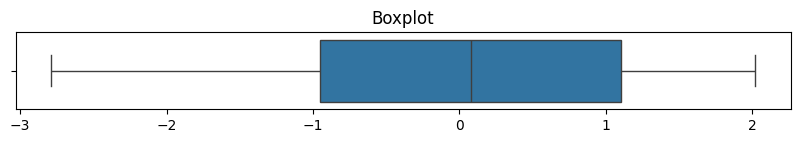

In [248]:
_, ax = plt.subplots(1, 1, figsize=(10, 1))
ax.set_title("Boxplot")
boxplot(x=sorted(e))
plt.show()

* h) Провести кросс-проверку регрессии

In [249]:
cvsss = np.array([])
for i in range(n):
    ksi = np.delete(sample_ksi, i, axis=0)
    nu = np.delete(sample_nu, i, axis=0)
    temp_betta = get_coef(ksi, nu)
    cvsss = np.append(cvsss, (sample_nu[i] - prediction(temp_betta, sample_ksi[i]))**2)
cvss = np.sum(cvsss)
R_square_cv = (tss - cvss) / tss
print(f'предсказательная способность модели: {R_square_cv}')


предсказательная способность модели: 0.7598848804037919


i) Проверить адекватность регрессии, сделав 5 повторных измерений в одной точке